## A. Regression

*Machine Learning* creates a *model* that captures the relationship between *feature vectors* and some *target variables* within a *training dataset*.
A feature vector is a set of features or attributes that characterize a particular object (e.g. the number of bedrooms, bathrooms, and location of an apartment).
If the target is a numeric value, we're building a *regressor*.
Regressors are fitting curves to data.

<p>
    <img src="https://mlbook.explained.ai/images/intro/fitpiecewise.svg" width = 300 height = 300>
</p>

### A.1. Importing Data

We are using `pandas` library to load the data into memory.
Our goal is to predict the price of an apartment based on the number of bedrooms, bathrooms, longitude and latitude.

In [1]:
import numpy  as np             # import numpy library (importing with alias np)
import pandas as pd             # import pandas library (importing with alias pd)
import matplotlib.pyplot as plt # import matplotlib library (importing with alias plt)

In [2]:
plt.style.use('ggplot')  # use ggplot styles for matplotlib figures

color_palette = {
     'crimson': '#a50026', 
     'red': '#d73027',
     'redorange': '#f46d43', 
     'orange': '#fdae61',
     'yellow': '#fee090', 
     'sky': '#e0f3f8',
     'babyblue': '#abd9e9', 
     'lightblue': '#74add1',
     'blue': '#4575b4', 
     'purple': '#313695'
}

In [3]:
PATH = '../data/rent.csv'

In [4]:
!ls '../data'  # to execute bash command in the notebook we are using '!' mark
!wc -l {PATH}  # we can even use python variables but we need '{' '}' braces
!du -h {PATH}

breast_cancer.csv  rent.csv
48301 ../data/rent.csv
1,3M	../data/rent.csv


In [5]:
data = pd.read_csv(filepath_or_buffer = PATH) # load the data into the data frame using read_csv pandas function
data

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795
...,...,...,...,...,...
48295,3,1.0,40.8433,-73.9396,2800
48296,2,1.0,40.8198,-73.9578,2395
48297,1,1.0,40.5765,-73.9554,1850
48298,2,1.0,40.7448,-74.0017,4195


Pandas' dataframe is a 2D structure that consists of rows and columns.
We can utilize number of attributes and methods to inspect and manipulate with this powerful data structure.

In [6]:
print(f'The dataset data type is {type(data)}')
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')
print(f'The dataset contains {data.size} values (rows x columns)')
print(f'The data frame index is {data.index}')
print(f'The data frame columns are {data.columns}')

The dataset data type is <class 'pandas.core.frame.DataFrame'>
The dataset has 48300 rows and 5 columns
The dataset contains 241500 values (rows x columns)
The data frame index is RangeIndex(start=0, stop=48300, step=1)
The data frame columns are Index(['bedrooms', 'bathrooms', 'latitude', 'longitude', 'price'], dtype='object')


In [7]:
memory_series = data.memory_usage(deep = True) / (1024*1024) # show memory usage in MB

data.info()
display(memory_series)
print(f'Total memory used: {memory_series.sum():.2f} MB')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   48300 non-null  int64  
 1   bathrooms  48300 non-null  float64
 2   latitude   48300 non-null  float64
 3   longitude  48300 non-null  float64
 4   price      48300 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB


Index        0.000122
bedrooms     0.368500
bathrooms    0.368500
latitude     0.368500
longitude    0.368500
price        0.368500
dtype: float64

Total memory used: 1.84 MB


In [8]:
price = data['price']

print(f'Price column data type is {type(price)}')
print(f'Price column size is {price.size}')
print(f'Price column shape is {price.shape}, number of dimensions is {price.ndim}, size in bytes is {price.nbytes}')
print(f'Price column index is {price.index}')
print(f'Average apartment price is {price.mean():.2f}$')

Price column data type is <class 'pandas.core.series.Series'>
Price column size is 48300
Price column shape is (48300,), number of dimensions is 1, size in bytes is 386400
Price column index is RangeIndex(start=0, stop=48300, step=1)
Average apartment price is 3438.30$


Let's see how number of bedrooms affects the price trend. 
Additionally, we can see the examples of manipulation with data frames and using `matplotlib` library to visualise the data.

,0,1,2,3,4,5,6,7,8,9
bathrooms,0.00,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,4.000000,4.5,10.0
price,3144.87,3027.007118,4226.336449,5278.595739,6869.047368,6897.974576,7635.357143,7422.888889,2050.0,3600.0


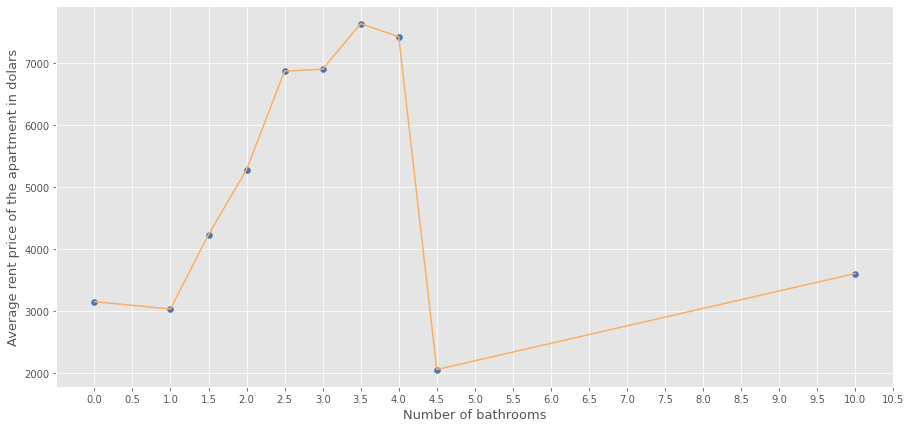

In [9]:
group_by_bathrooms = data.groupby(['bathrooms']).mean()
group_by_bathrooms = group_by_bathrooms.reset_index()
group_by_bathrooms = group_by_bathrooms.drop(['bedrooms', 'longitude', 'latitude'], axis = 1)

display(group_by_bathrooms.transpose())

figure, axes = plt.subplots(figsize = (15, 7))
axes.scatter(group_by_bathrooms['bathrooms'].values, group_by_bathrooms['price'].values, color = color_palette['blue'])
axes.plot(group_by_bathrooms['bathrooms'].values, group_by_bathrooms['price'].values, color = color_palette['orange'])

axes.set_xlabel('Number of bathrooms', fontdict = {'fontsize': 13})
axes.set_ylabel('Average rent price of the apartment in dolars', fontdict = {'fontsize': 13})
axes.set_xticks(np.arange(start = 0, stop = 11, step = 0.5))

plt.show()

### A.2. Training Linear Regression Model

In this section we use `sklearn` library to train and assess the linear regression model.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [11]:
features, target = data[['bedrooms', 'bathrooms', 'latitude', 'longitude']], data['price']

print(f'Dataset features and target shapes {features.shape, target.shape}')

Dataset features and target shapes ((48300, 4), (48300,))


In [12]:
linear_regressor = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = -1)
linear_regressor.fit(X = features, y = target)

predictions = linear_regressor.predict(X = features)
ma_error = mean_absolute_error(y_true = target, y_pred = predictions)
error_percentage = (ma_error * 100.00 / target.mean())

print(f'R^2 score of the model (using sklearn metric function) is {r2_score(target, predictions)}')
print(f'R^2 score of the model (using model scoring function) is {linear_regressor.score(X = features, y = target)}')
print(f'Mean Absolute Error (MAE) is {ma_error:.2f}$. Error percentage {error_percentage:.2f}%')

R^2 score of the model (using sklearn metric function) is 0.5763157313659286
R^2 score of the model (using model scoring function) is 0.5763157313659286
Mean Absolute Error (MAE) is 658.78$. Error percentage 19.16%


In [13]:
features_train, features_validation, target_train, target_validation = train_test_split(features, target, test_size = 0.2)

print(f'Training dataset features and target shapes {features_train.shape, target_train.shape}')
print(f'Validation dataset features and target shapes {features_validation.shape, target_validation.shape}')

Training dataset features and target shapes ((38640, 4), (38640,))
Validation dataset features and target shapes ((9660, 4), (9660,))


In [14]:
linear_regressor = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = -1)
linear_regressor.fit(X = features_train, y = target_train)

predictions = linear_regressor.predict(X = features_validation)
ma_error = mean_absolute_error(y_true = target_validation, y_pred = predictions)
error_percentage = (ma_error * 100.00 / target_validation.mean())

print(f'R^2 score of the model (using sklearn metric function) is {r2_score(target_validation, predictions)}')
print(f'R^2 score of the model (using model scoring function) is {linear_regressor.score(X = features_validation, y = target_validation)}')
print(f'Mean Absolute Error (MAE) is {ma_error:.2f}$. Error percentage {error_percentage:.2f}%')

R^2 score of the model (using sklearn metric function) is 0.5949251728364259
R^2 score of the model (using model scoring function) is 0.5949251728364259
Mean Absolute Error (MAE) is 645.42$. Error percentage 18.78%


In [15]:
print(f'Linear regression model coefficients: {linear_regressor.coef_}')
print(f'Linear regression model intercept: {linear_regressor.intercept_}')
print(f'Names of features seen during fit: {linear_regressor.feature_names_in_}')

Linear regression model coefficients: [   453.56991727   1437.17094352   1443.02321895 -15829.00792226]
Linear regression model intercept: -1228651.3860052403
Names of features seen during fit: ['bedrooms' 'bathrooms' 'latitude' 'longitude']


### A.3. Training Random Forest Regression Model

The second regression model we are going to train is the `RandomForestRegressor`.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [17]:
features, target = data[['bedrooms', 'bathrooms', 'latitude', 'longitude']], data['price']

random_forest_regressor = RandomForestRegressor(n_estimators = 25) # train 25 trees
random_forest_regressor.fit(features, target)

RandomForestRegressor(n_estimators=25)

Once we've trained a model, we have to test it, just like we do with software before deployment. 
There are two things to test. 
First, we verify that the model fits the training data well, meaning that the model captures the relationship in the training data between feature vectors and the targets. 
Second, we verify that the model generalizes, yielding reasonable rent predictions for feature vectors not in the training set.

To see how well the model fits the training data, we pass the feature vectors of the training data back into the model and compare the predictions to the known actual prices. 
At this point in our process, we don't care about generality. 
We're just checking that our model can reproduce the original training data with some degree of accuracy. 
If the model can't make accurate predictions for apartments it trained on, then there's no hope the model will generalize to previously-unseen apartments.

To assess the model, we'll make a prediction for every apartment and subtract that from the actual price found in the training data (and take absolute value). 
The average of those differences is the mean absolute error, abbreviated `MAE`, and `sklearn` provides a ready-made function to compute that.

In [18]:
predictions = random_forest_regressor.predict(features)

ma_error = mean_absolute_error(target, predictions)
error_percentage = (ma_error * 100.00 / target.mean())

print(f'R^2 score of the model (using sklearn metric function) is {r2_score(target, predictions)}')
print(f'R^2 score of the model (using model scoring function) is {random_forest_regressor.score(X = features, y = target)}')
print(f'Mean Absolute Error (MAE) is {ma_error:.2f}$. Error percentage {error_percentage:.2f}%')

R^2 score of the model (using sklearn metric function) is 0.9453306530670244
R^2 score of the model (using model scoring function) is 0.9453306530670244
Mean Absolute Error (MAE) is 186.84$. Error percentage 5.43%


The true measure of model quality is its generality: how accurately it predicts prices for apartment feature vectors not found in the training data. 
For this purpose, we divide our data set into two parts: training and validation dataset.
We want the validation error to be as close to the training error as possible.

In [19]:
features_train, features_validation, target_train, target_validation = train_test_split(features, target, test_size = 0.2)

random_forest_regressor = RandomForestRegressor(n_estimators = 25) # train 25 trees
random_forest_regressor.fit(features_train, target_train)

predictions = random_forest_regressor.predict(features_validation)
ma_error = mean_absolute_error(target_validation, predictions)
error_percentage = (ma_error * 100.00 / target.mean())

print(f'R^2 score of the model (using sklearn metric function) is {r2_score(target_validation, predictions)}')
print(f'R^2 score of the model (using model scoring function) is {random_forest_regressor.score(X = features_validation, y = target_validation)}')
print(f'Mean Absolute Error (MAE) is {ma_error:.2f}$. Error percentage {error_percentage:.2f}%')

R^2 score of the model (using sklearn metric function) is 0.8536220080144109
R^2 score of the model (using model scoring function) is 0.8536220080144109
Mean Absolute Error (MAE) is 302.00$. Error percentage 8.78%


Now that we have a metric of model generality, we can use it to tweak model architecture in an effort to improve accuracy.
The idea is to wiggle some aspect(s) of the model and see if the validation error goes up or down.
The number of trees, and any other aspect of the model that affects its architecture, statisticians call a *hyper-parameter*.

In [20]:
features_train, features_validation, target_train, target_validation = train_test_split(features, target, test_size = 0.2)

random_forest_regressor = RandomForestRegressor(n_estimators = 100) # train 100 trees
random_forest_regressor.fit(features_train, target_train)

predictions      = random_forest_regressor.predict(features_validation)
ma_error         = mean_absolute_error(target_validation, predictions)
error_percentage = (ma_error * 100.00 / target.mean())

print(f'R^2 score of the model (using sklearn metric function) is {r2_score(target_validation, predictions)}')
print(f'R^2 score of the model (using model scoring function) is {random_forest_regressor.score(X = features_validation, y = target_validation)}')
print(f'Mean Absolute Error (MAE) is {ma_error:.2f}$. Error percentage {error_percentage:.2f}%')

R^2 score of the model (using sklearn metric function) is 0.8596866632653584
R^2 score of the model (using model scoring function) is 0.8596866632653584
Mean Absolute Error (MAE) is 295.49$. Error percentage 8.59%


Machine learning models do much more for us than make predictions. 
Depending on the model, we can learn quite a bit about the data itself.
One such technique is determining feature importances. 
A feature column from the validation set is permuted and the metric is evaluated. 
The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

In [21]:
importances = permutation_importance(random_forest_regressor, features_validation, target_validation, n_repeats = 10, n_jobs = -1)

forest_importances = pd.DataFrame(
    data    = np.hstack((importances['importances_mean'].reshape(-1, 1), importances['importances_std'].reshape(-1, 1))), 
    index   = data.columns[:-1],
    columns = ['importances_mean', 'importances_std']
)

forest_importances

,importances_mean,importances_std
bedrooms,0.528632,0.006810
bathrooms,0.462949,0.010396
latitude,0.466176,0.008176
longitude,0.529886,0.012791


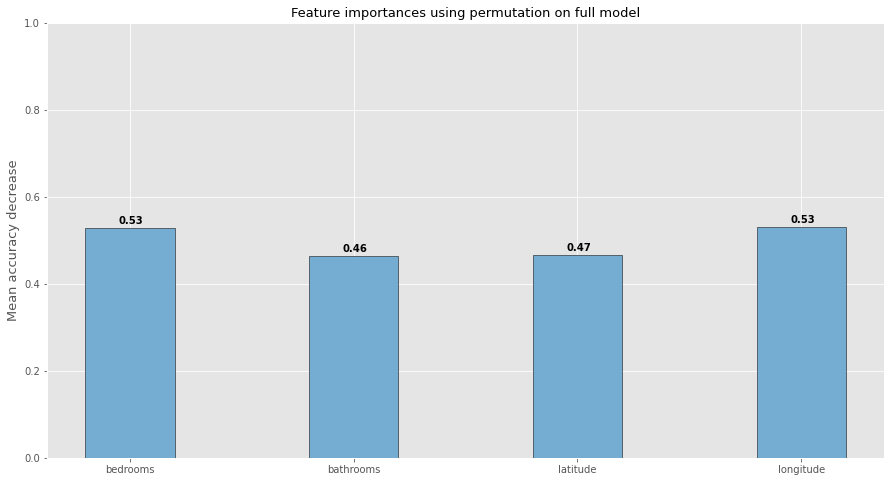

In [22]:
figure, axes = plt.subplots(figsize = (15, 8))

axes.bar(
    x = forest_importances.index, 
    height = forest_importances['importances_mean'],
    width = 0.4,
    color = color_palette['lightblue'],
    edgecolor = 'black'
)

for index, value in enumerate(forest_importances['importances_mean']):
    axes.text(index - 0.05, value + 0.01, str(round(value,2)), fontweight = 'bold')

axes.set_ylim(bottom = 0, top = 1)
axes.set_ylabel('Mean accuracy decrease', fontdict = {'fontsize': 13})
axes.set_title('Feature importances using permutation on full model', fontdict = {'fontsize': 13})

plt.show()

## B. Classification

*Machine Learning* creates a *model* that captures the relationship between *feature vectors* and some *target variables* within a *training dataset*.
A feature vector is a set of features or attributes that characterize a particular object (e.g. shape, size, and other characteristics of cell nuclei in digitized images).
If the target is a discrete category or class, we're building a *classifier*.
Classifiers are drawing decision boundaries in between data points associated with the various categories.

<p>
    <img src="https://mlbook.explained.ai/images/intro/mindist-decision-lines.svg" width = 300 height = 300>
</p>

### B.1. Importing Dataset

To build our first classifier, we're going to train a model using the well-known Wisconsin Breast Cancer dataset.
There are `569` observations (patients) in the breast cancer data set and each observation has 30 numeric predictive features. 
The target variable (diagnosis) is a binary variable that indicates malignant or benign outcome. 
The features describe the shape, size, and other characteristics of cell nuclei in digitized images;

In [23]:
PATH = '../data/breast_cancer.csv'

In [24]:
!wc -l {PATH}
!du -h {PATH}

569 ../data/breast_cancer.csv
124K	../data/breast_cancer.csv


In [25]:
data = pd.read_csv(filepath_or_buffer = PATH)
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes # convert target to categorical (integers)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
print(f'The dataset data type is {type(data)}')
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')
print(f'The dataset contains {data.size} values (rows x columns)')
print(f'The data frame index is {data.index}')
print(f'The data frame columns are {data.columns}')

The dataset data type is <class 'pandas.core.frame.DataFrame'>
The dataset has 569 rows and 32 columns
The dataset contains 18208 values (rows x columns)
The data frame index is RangeIndex(start=0, stop=569, step=1)
The data frame columns are Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [27]:
memory_series = data.memory_usage(deep = True) / 1024 # show memory usage in KB

data.info()
display(memory_series)
print(f'Total memory used: {memory_series.sum():.2f} KB')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int8   
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Index                      0.125000
id                         4.445312
diagnosis                  0.555664
radius_mean                4.445312
texture_mean               4.445312
perimeter_mean             4.445312
area_mean                  4.445312
smoothness_mean            4.445312
compactness_mean           4.445312
concavity_mean             4.445312
concave points_mean        4.445312
symmetry_mean              4.445312
fractal_dimension_mean     4.445312
radius_se                  4.445312
texture_se                 4.445312
perimeter_se               4.445312
area_se                    4.445312
smoothness_se              4.445312
compactness_se             4.445312
concavity_se               4.445312
concave points_se          4.445312
symmetry_se                4.445312
fractal_dimension_se       4.445312
radius_worst               4.445312
texture_worst              4.445312
perimeter_worst            4.445312
area_worst                 4.445312
smoothness_worst           4

Total memory used: 138.49 KB


### B.2. Training Logistic Regression Model

In this section we use `sklearn` library to train and assess the logistic regression model.

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [29]:
features, target = data.drop(labels = 'diagnosis', axis = 1), data['diagnosis']

print(f'Dataset features and target shapes {features.shape, target.shape}')

Dataset features and target shapes ((569, 31), (569,))


In [30]:
logistic_regressor = LogisticRegression(fit_intercept = True, n_jobs = -1)
logistic_regressor.fit(X = features, y = target)

predictions = logistic_regressor.predict(X = features)

print(f"Accuracy: {logistic_regressor.score(features, target)*100:.2f}%")
print(f"Accuracy (using sklearn metric): {accuracy_score(target, predictions)*100:.2f}%")

Accuracy: 62.74%
Accuracy (using sklearn metric): 62.74%


In [31]:
features_train, features_validation, target_train, target_validation = train_test_split(features, target, test_size = 0.2)

print(f'Training dataset features and target shapes {features_train.shape, target_train.shape}')
print(f'Validation dataset features and target shapes {features_validation.shape, target_validation.shape}')

Training dataset features and target shapes ((455, 31), (455,))
Validation dataset features and target shapes ((114, 31), (114,))


In [32]:
logistic_regressor = LogisticRegression(fit_intercept = True, n_jobs = -1)
logistic_regressor.fit(X = features_train, y = target_train)

predictions = logistic_regressor.predict(X = features_validation)

print(f"Accuracy: {logistic_regressor.score(features_validation, target_validation)*100:.2f}%")
print(f"Accuracy (using sklearn metric): {accuracy_score(target_validation, predictions)*100:.2f}%")

Accuracy: 59.65%
Accuracy (using sklearn metric): 59.65%


In [33]:
print(f'A list of class labels known to the classifier: {logistic_regressor.classes_}')
print(f'Logistic regression model coefficients: {logistic_regressor.coef_}')
print(f'Logistic regression model intercept: {logistic_regressor.intercept_}')
print(f'Names of features seen during fit: {linear_regressor.feature_names_in_, len(linear_regressor.feature_names_in_)}')

A list of class labels known to the classifier: [0 1]
Logistic regression model coefficients: [[-3.56793044e-10 -7.03705420e-16 -1.78579865e-15 -3.91981818e-15
   3.45848254e-14 -1.14652467e-17  8.65597774e-19  1.59493030e-17
   8.42610991e-18 -2.11778954e-17 -9.14548448e-18  2.17402239e-17
  -1.79760356e-16  1.62579767e-16  7.13425500e-15 -1.13545010e-18
  -1.03474608e-18 -8.17639893e-19 -4.27552445e-19 -2.90818524e-18
  -4.49700179e-19 -3.89626938e-16 -2.15682369e-15 -1.77224975e-15
   9.06022899e-14 -1.41828706e-17  1.07869871e-17  3.18153520e-17
   1.06003153e-17 -2.75519492e-17 -9.11330005e-18]]
Logistic regression model intercept: [-1.43876895e-16]
Names of features seen during fit: (array(['bedrooms', 'bathrooms', 'latitude', 'longitude'], dtype=object), 4)


### B.3. Training Random Forest Classifier

The second classification model we are going to train is the `RandomForestClassifier`.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
features, target = data.drop(labels = 'diagnosis', axis = 1), data['diagnosis']

print(f'Dataset features and target shapes {features.shape, target.shape}')

Dataset features and target shapes ((569, 31), (569,))


For classifiers, the `score()` function returns the simplest metric for correctness (accuracy), which measures how many outputs the model predicted correctly out of `569` observations divided by `569`.

In [36]:
features_train, features_validation, target_train, target_validation = train_test_split(features, target, test_size = 0.15)

random_forest_classifier = RandomForestClassifier(n_estimators = 200)
random_forest_classifier.fit(features_train, target_train)

predictions = random_forest_classifier.predict(X = features_validation)
accuracy = random_forest_classifier.score(features_validation, target_validation)

print(f"Accuracy: {random_forest_classifier.score(features_validation, target_validation)*100:.2f}%")
print(f"Accuracy (using sklearn metric): {accuracy_score(target_validation, predictions)*100:.2f}%")

Accuracy: 95.35%
Accuracy (using sklearn metric): 95.35%


Models can only make predictions based upon the training data provided to them. 
They don't necessarily have the same experience we do, so we have to match our prediction expectations to the training data when judging a model. 
Or, we can remedy the situation by providing a more extensive training set.

Dfferent models can perform differently on the same data set, and a linear model is a good lower bound benchmark. Comparing an RF with a linear model gives us an idea of the difficulty of the problem and could identify problems with our RF model. 
RFs perform very well in general and do not make assumptions about the underlying feature-target relationship, unlike linear models, but have difficulty extrapolating beyond the training feature ranges. 
Different models also have different memory footprints and this must be weighed against model strength, according to your project requirements.